In [238]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [239]:
mouse_metadata_path = "Downloads/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Downloads/Pymaceuticals/data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [240]:
# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='right')

In [241]:
# Display the data table for preview
Combined_data = Combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

Combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [242]:
# Check the number of mice IDs
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [243]:
# Check for duplicate mice by IDs with duplicate Timepoints
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [244]:
# Display the data associated with that mouse ID
dup_mice_df = Combined_data.loc[Combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [245]:
# Display a clean DataFrame by removing the duplicate mouse by its ID
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [246]:
# Display the updated number of unique mice IDs in the clean DataFrame
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

# Summary Statistics

In [247]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each Drug regimen
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, 
                                    "Median":regimen_median, 
                                    "Volume Variance":regimen_variance, 
                                    "Volume Std. Dev.": regimen_std, 
                                    "Volume SEM": regimen_sem})
summary_stats_table

,Mean,Median,Volume Variance,Volume Std. Dev.,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

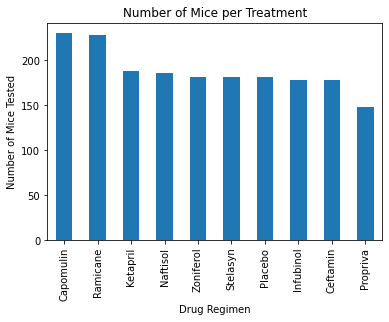

In [248]:
# Create a Bar plot to show the total total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mice_count = clean_df["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

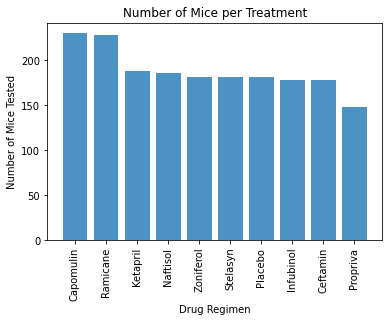

In [249]:
# Create a Bar plot to show the total total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

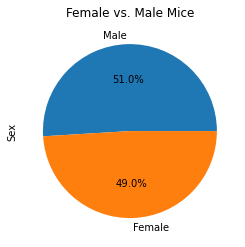

In [250]:
# Create a pie chart to show the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

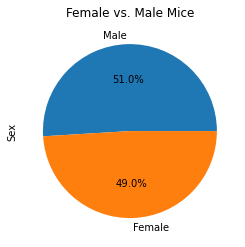

In [251]:
# Create a pie chart to show the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

# Quartiles, Outliers and Boxplots

In [252]:
# Calculate the final tumor volume of each mouse across the four treatment regimens
# Calculate the quartiles and IQR, and determine if there are any potential outliers
by_mouse = Combined_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(Combined_data,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [253]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse and merge with the original Dataframe
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = Combined_data[Combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

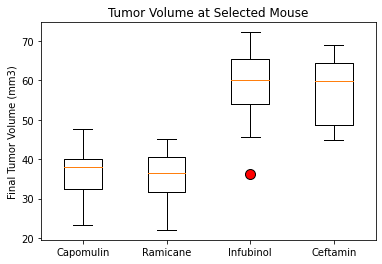

In [254]:
# Generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

# Line Plot and a Scatter Plot

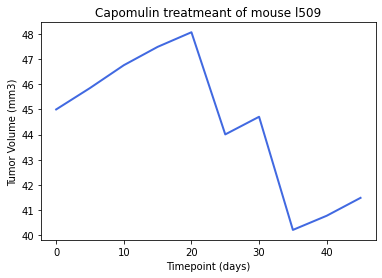

In [255]:
# Generate a line plot of tumor volume versus time point using a single mouse that was treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

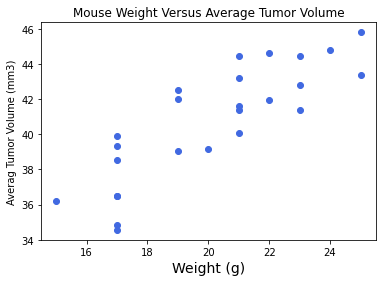

In [256]:
# Generate a scatter plot of mouse weight vs average observed tumor volume for Capomulin
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="royalblue")
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


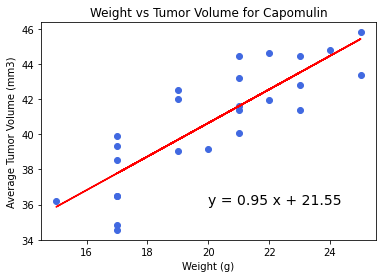

In [257]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for Capomulin
# Plot the linear regression model on top of the previous scatter plot
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='royalblue')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()